In [ ]:
#@title mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title install
!pip install minisom
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=5db6c2e0e60a2c1553a2a73ecb5670a331a7a537ab9dd8d837da7ca2358d22d4
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.2 MB/s 


In [ ]:
#@title libraries

# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from time import strptime
from scipy import stats
import zipfile
import json
import os
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans, KShape, KernelKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA

In [ ]:
#@title csv file for each user
path = '/content/drive/MyDrive/insight_data_analysis/Insight4wear Dataset 24 May 2021/dataset/final_data'
users_list = []

for root, directories, files in os.walk(path):
  for user in directories:
      user_heartrate_list = []
      folder = path + '/' + user
      for root, directories, files in os.walk(folder):
        for file in files:
          if file.startswith('w') and file.endswith('.zip'):
            zip = folder + '/' + file
            try:
                with zipfile.ZipFile(zip) as z:
                    folder_list = z.namelist()
                    hr_file = [x for x in folder_list if x.startswith('HeartRate/')]
                    if len(hr_file) == 1:
                        hr_file = hr_file[0]
                        for i in range(int(np.floor((len(z.open(hr_file).read()))/len((z.open(hr_file)).readlines())))):
                            with z.open(hr_file) as f:
                                data = f.readlines()[i]
                                data = json.loads(data)
                                lst = [user, data['sensor_name'], data['timestamp'],
                                      data['sensor_data']['bpm']]
                                user_heartrate_list.append(lst)
            except Exception as e:
                print(e)

      df = pd.DataFrame(user_heartrate_list,
                        columns = ['user', 'sensor_name', 'timestamp', 'bpm'])
      df.groupby(['user', 'timestamp'])['bpm'].mean().reset_index()
      df['time'] = np.nan


      for index, row in df.iterrows():
          print('Processed Row: ' + str(index))
          ts = row['timestamp'].split()



          hour = int(ts[3].split(':')[0])
          if 6< hour <= 7:
            df.loc[index, 'time'] = 7
          elif 7 < hour <= 8 :
            df.loc[index, 'time'] = 8
          elif 8 < hour <= 9 :
            df.loc[index, 'time'] = 9
          elif 9 < hour <= 10 :
            df.loc[index, 'time'] = 10
          elif 10 < hour <= 11 :
            df.loc[index, 'time'] = 11
          elif 11 < hour <= 12 :
            df.loc[index, 'time'] = 12
          elif 12 < hour <= 13 :
            df.loc[index, 'time'] = 13
          elif 13 < hour <= 14 :
            df.loc[index, 'time'] = 14
          elif 14 < hour <= 15 :
            df.loc[index, 'time'] = 15
          elif 15 < hour <= 16 :
            df.loc[index, 'time'] = 16
          elif 16 < hour <= 17 :
            df.loc[index, 'time'] = 17
          elif 417 < hour <= 18 :
            df.loc[index, 'time'] = 18
          elif 18 < hour <= 19 :
            df.loc[index, 'time'] = 19
          elif 19 < hour <= 20 :
            df.loc[index, 'time'] = 20
          elif 20 < hour <= 21 :
            df.loc[index, 'time'] = 21
          elif 21 < hour <= 22 :
            df.loc[index, 'time'] = 22
          elif 22 < hour <= 23 :
            df.loc[index, 'time'] = 23
          elif 5 < hour <= 6 :
            df.loc[index, 'time'] = 6
          elif 4 < hour <= 5 :
            df.loc[index, 'time'] = 5
          elif 3 < hour <= 4 :
            df.loc[index, 'time'] = 4
          elif 3 < hour <= 2 :
            df.loc[index, 'time'] = 2
          elif 2 < hour <= 1 :
            df.loc[index, 'time'] = 1
          else:
            df.loc[index, 'time'] = 0


      df = df.groupby(['time','weekend'])['bpm'].mean().reset_index()
      df['bpm'] = df['bpm'].astype(int)
      # df = df.drop(['timestamp', 'sensor_name','user'], axis = 1)

      %cd '/content/drive/MyDrive/insight_data_analysis/Insight4wear Dataset 24 May 2021/HeartRate/ts24'
      df.to_csv(f'./user_{user}.csv')

Analysis

In [ ]:
directory = '/content/drive/MyDrive/insight_data_analysis/Insight4wear Dataset 24 May 2021/HeartRate/TS_24/'

mySeries = []
namesofMySeries = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        df = pd.read_csv(directory+filename)
        if not df.empty:
          try:
              # df = df[df['weekend']== 1]
              # df = df[(df['time'] >= 22) | (df['time'] <= 6)]
              # df = df[(df['time'] >= 15)]
              df = df.loc[:,["time","bpm"]]
              # While we are at it I just filtered the columns that we will be working on
              df.set_index("time",inplace=True)
              # ,set the date columns as index
              df.sort_index(inplace=True)
              # and lastly, ordered the data according to our date index
              mySeries.append(df)
              namesofMySeries.append(filename[:])

          except Exception as e:
                  print(e)

In [ ]:
print(len(mySeries))

322


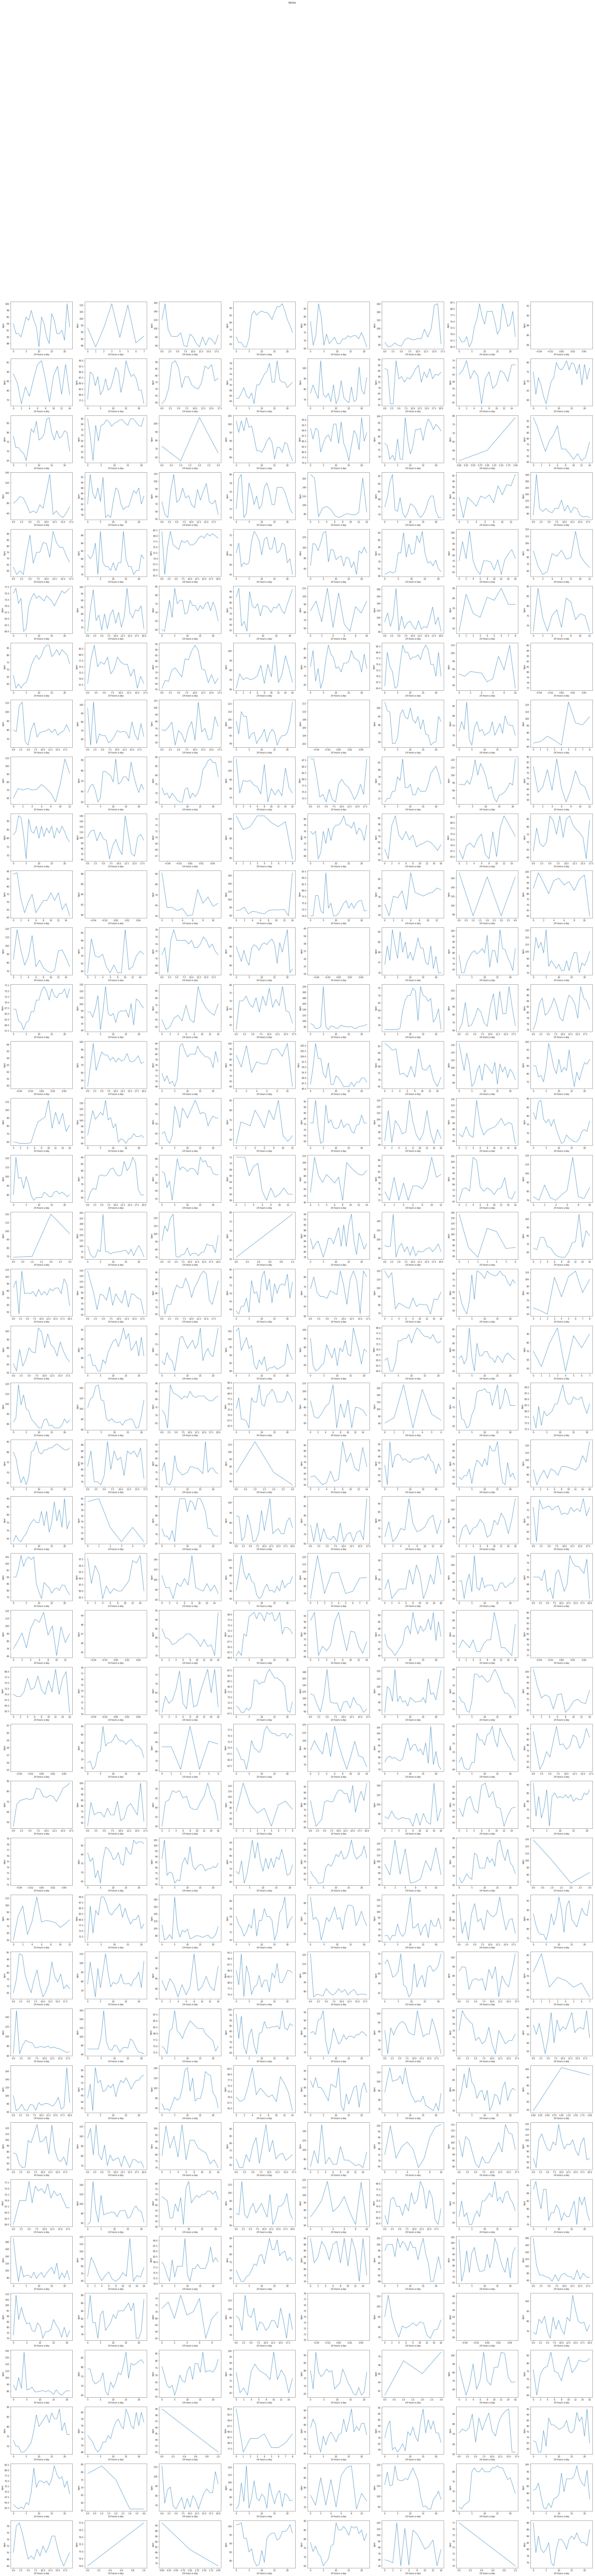

In [ ]:
fig, axs = plt.subplots(40,8,figsize=(50,200))
fig.suptitle('Series')
for i in range(40):
    for j in range(8):
        if i*8+j+1>len(mySeries): # pass the others that we can't fill
            continue
        axs[i, j].plot(mySeries[i*8+j].values)
        # axs[i, j].set_title(namesofMySeries[i*4+j])
        axs[i, j].set_xlabel('24 hours a day')
        axs[i, j].set_ylabel('bpm')
# plt.savefig("1.pdf",dpi=400)
plt.show()


In [ ]:
series_lengths = {len(series) for series in mySeries}
print(series_lengths)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


In [ ]:
max_len = max(series_lengths)
longest_series = None
for series in mySeries:
    if len(series) == max_len:
        longest_series = series

In [ ]:
problems_index = []

for i in range(len(mySeries)):
    if len(mySeries[i])!= max_len:
        problems_index.append(i)
        mySeries[i] = mySeries[i].reindex(longest_series.index) #,fill_value=0)

In [ ]:
def nan_counter(list_of_series):
    nan_polluted_series_counter = 0
    for series in list_of_series:
        if series.isnull().sum().sum() > 0:
            nan_polluted_series_counter+=1
    print(nan_polluted_series_counter)

In [ ]:
for i in problems_index:
    mySeries[i].interpolate(limit_direction="both",inplace=True)

In [ ]:
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

In [ ]:
print("max: "+str(max(mySeries[0]))+"\tmin: "+str(min(mySeries[0])))
print(mySeries[0][:5])

max: 1.0	min: 0.0
[0.53846154 0.30769231 0.30769231 0.23076923 0.46153846]


clustring

In [ ]:
import math
som_x, som_y = 4,4
#  math.ceil(math.sqrt(math.sqrt(len(mySeries))))
#
# I didn't see its significance but to make the map square,
# I calculated square root of map size which is
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(som_x, som_y,len(mySeries[0]), sigma=0.3, learning_rate = 0.1)

som.random_weights_init(mySeries)
som.train(mySeries, 10000)


In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

# set the axis line width in pixels
# for axis in 'left', 'bottom':
  # ax.spines[axis].set_linewidth(2.5)

# set the parameters for both axis: label size in font points, the line tick line
# width and length in pixels
ax.tick_params(axis='both', which='major', labelsize=20, width=9.5, length=10)

# alternatively, set for individual axis:
#ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
#ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)

plt.show()

In [ ]:
# Little handy function to plot series
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(40,40))
    fig.suptitle('Clusters_summer')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].tick_params(axis='both', which='major', labelsize=30, width=2.5, length=10)
                    axs[cluster].plot(series,c='0.8',alpha=0.9)
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            # axs[cluster].set_title(f"Cluster {cluster_number}",size = 36)
            axs[cluster].set_ylabel("  summer    ",size = 36)
            # axs[cluster].set_xlabel("times of a day",size = 36)

    %cd /content/drive/MyDrive/insight_data_analysis/Insight4wear Dataset 24 May 2021/result

    plt.savefig("SOM_test14.pdf")
    plt.show()


In [ ]:
import random
import numpy as np
cluster_mm = []
cluster_m = []
m = []
mm = []

#Pvalue

for i in win_map[(0,0)]:
   cluster_m.append(i[4])


for i in win_map[(1,0)]:
   cluster_mm.append(i[4])

print(np.mean(cluster_m))
print(np.mean(cluster_mm))

m.append(np.mean(random.sample(list(cluster_m),50,)))
mm.append(np.mean(random.sample(list(cluster_mm),50,)))
print(m)
print(mm)

from scipy import stats
stats.ttest_ind(84,74)

0.1798588568419168
0.6726756005608917
[0.15460819386833133]
[0.7195094958935654]


In [ ]:
from scipy import stats
stats.ttest_ind(84,74)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

kmeans

In [ ]:
cluster_count = 5
# math.ceil(math.sqrt(len(mySeries)))
print(cluster_count)
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=17, metric="dtw")
labels1 = km.fit_predict(mySeries)

5


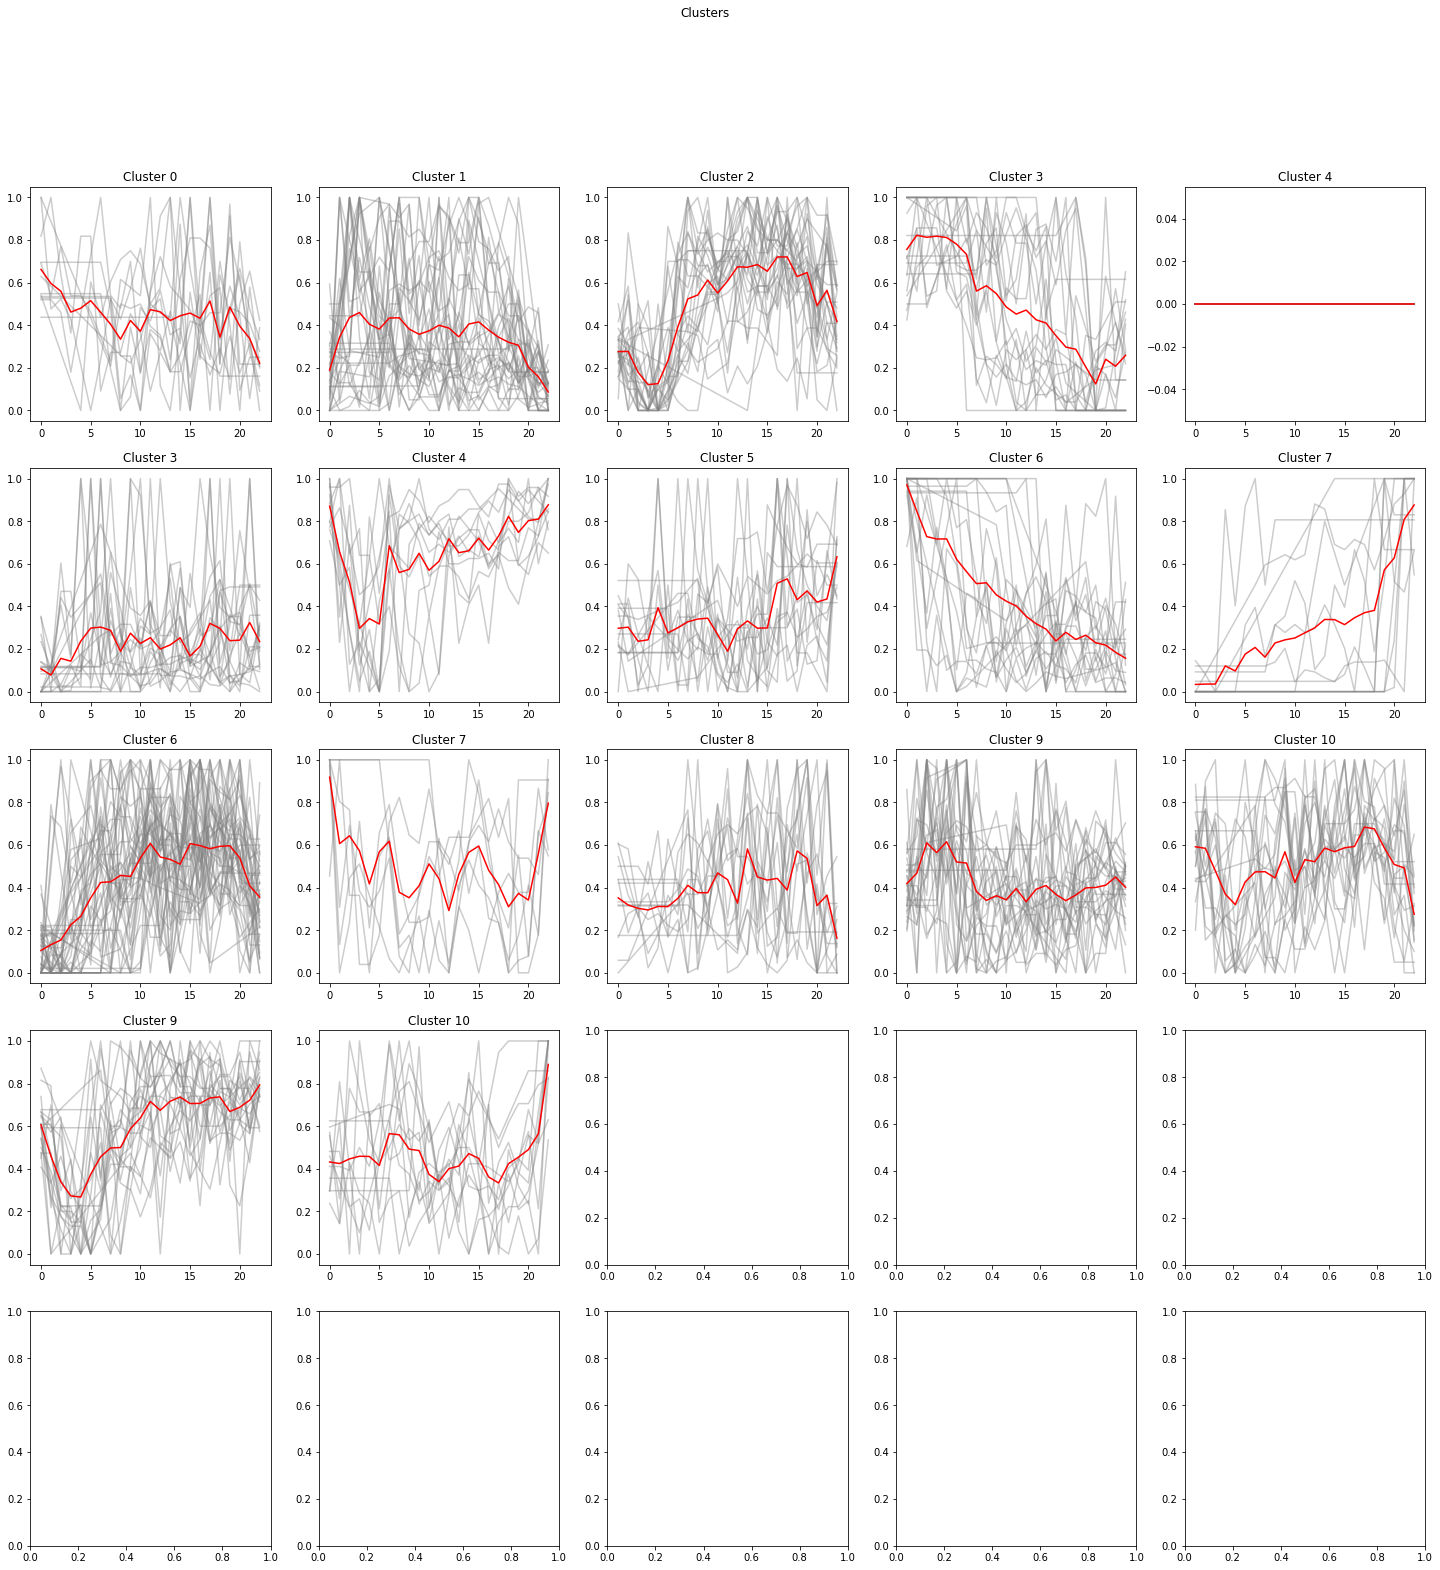

In [ ]:
plot_count = 5
#  math.ceil(math.sqrt(cluster_count))
som_y = 3
fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels1):
    cluster = []
    for i in range(len(labels1)):
            if(labels1[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.show()
# plt.savefig("kmeans.pdf")

KShape


In [ ]:
cluster_count = math.ceil(math.sqrt(len(mySeries)))
print(cluster_count)
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

ksh = KShape(n_clusters=24)
labels2 = ksh.fit_predict(mySeries)plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels2):
    cluster = []
    for i in range(len(labels2)):
            if(labels2[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.show()
# plt.savefig("kmeans.pdf")

KernelKMeans

In [ ]:
cluster_count = math.ceil(math.sqrt(len(mySeries)))
print(cluster_count)
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km =  KernelKMeans(n_clusters=24)
labels3 = km.fit_predict(mySeries)

In [ ]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels3):
    cluster = []
    for i in range(len(labels3)):
            if(labels3[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.show()

 OPTIC


In [ ]:
Times = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
new = []
for i in  mySeries:
    new.append(list(zip(Times,i)))

In [ ]:
data = np.array(new)

In [ ]:
data.shape

In [ ]:
# save shape info in three separate variables
x, y, z = data.shape
print(x)
# idea from https://stackoverflow.com/a/36235454/5050691
output_arr = np.column_stack((np.repeat(np.arange(x), y), data.reshape(x * y, -1)))
# create a df out of the arr
df = pd.DataFrame(output_arr)
# rename for understandability
df = df.rename(columns={0: 'index', 1: 'time', 2: 'value'})
# Change the orientation between rows and columns so that rows
# that contain time info become columns
df = df.pivot(index="index", columns="time", values="value")
df.rename_axis(None, axis=1).reset_index()
# get columns that refer to specific interval of time series
temporal_accessors = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
# extract data that will be used to carry out clustering
data_for_clustering = df[temporal_accessors].to_numpy()

# a set of exemplary params
params = {
"xi": 0.05,
"metric": "euclidean",
"min_samples": 15
}
# clusterer =DBSCAN()
clusterer = OPTICS(min_samples = 8, xi = 0.0000001, min_cluster_size = 0.0000001)
fitted = clusterer.fit(data_for_clustering)
cluster_labels = fitted.labels_
df["cluster"] = cluster_labels
# Note: density based algortihms have a notion of the "noise-cluster", which is marked with
# -1 by sklearn algorithms. That's why starting index is -1 for density based clustering,
# and 0 otherwise.
labels4 = clusterer.labels_
# df["cluster"].value_counts()

In [ ]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels4):
    cluster = []
    for i in range(len(labels4)):
            if(labels4[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.show()

Rand Index

In [ ]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

print("rand_score")
print(f'som = {rand_score(gt,labels)}')
print(f'kmeans = {rand_score(gt,labels1)}')
print(f'kshape = {rand_score(gt,labels2)}')
print(f'kernel = {rand_score(gt,labels3)}')
print(f'optics = {rand_score(gt,labels4)}')
print(f'DBSCAN = {rand_score(gt,labels5)}')
print(f'Agglomerative = {rand_score(gt,labels6)}')
print("")
print("adjusted_rand_score")
print(f'som = {adjusted_rand_score(gt,labels)}')
print(f'kmeans = {adjusted_rand_score(gt,labels1)}')
print(f'kshape = {adjusted_rand_score(gt,labels2)}')
print(f'kernel = {adjusted_rand_score(gt,labels3)}')
print(f'optics = {adjusted_rand_score(gt,labels4)}')
print(f'DBSCAN = {adjusted_rand_score(gt,labels5)}')
print(f'Agglomerative = {adjusted_rand_score(gt,labels6)}')

rand_score
som = 0.8946808304792864
kmeans = 0.8967125249124437
kshape = 0.8606451113562044
kernel = 0.8913914204446508
optics = 0.4516166482846694
DBSCAN = 0.6916468334591049
Agglomerative = 0.8321626903504189

adjusted_rand_score
som = 0.01429550651575758
kmeans = 0.00021398008384827197
kshape = 0.005707900039855398
kernel = -0.00017148232815753517
optics = -0.0029370571835936974
DBSCAN = 0.0035837613402134997
Agglomerative = 0.0040395495755522265


purity

In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [ ]:
print(purity_score(gt,labels))
print(purity_score(gt,labels1))
print(purity_score(gt,labels2))
print(purity_score(gt,labels3))
print(purity_score(gt,labels4))
print(purity_score(gt,labels5))
print(purity_score(gt,labels6))

0.2422360248447205
0.2204968944099379
0.20496894409937888
0.2204968944099379
0.14906832298136646
0.14906832298136646
0.16149068322981366


In [ ]:
metric = []
for i in range(2,25):
    clusterer = TimeSeriesKMeans(n_clusters=i, metric="dtw")
    cluster_labels = clusterer.fit_predict(mySeries)
    # print(cluster_labels)
    metric.append(silhouette_score(mySeries, cluster_labels))

metric

[0.13046337717709436,
 0.056907644481751535,
 0.05842339812579681,
 0.06487050541658262,
 0.05174580865740906,
 0.040377855275598076,
 0.03993737892853454,
 0.0447289575018303,
 0.02730623499758094,
 0.021889648544961473,
 0.019435619461092863,
 0.018684906441239227,
 0.02207285063371878,
 0.023263432648863016,
 0.00516101122020444,
 0.010637714081690047,
 0.011029525130378729,
 -0.006300304258711654,
 0.0017684911145606347,
 -0.00032067758332491534,
 -0.01295476514399298,
 -0.0006637056957288165,
 -0.0031421615356049793]

In [ ]:
metric = []
for i in range(2,25):
    clusterer = KShape(n_clusters=i)
    cluster_labels = clusterer.fit_predict(mySeries)
    # print(cluster_labels)
    metric.append(silhouette_score(mySeries, cluster_labels))

metric

[0.11961278849729824,
 0.11103773341442151,
 0.05512156606145859,
 -0.05203379044335886,
 -0.012762997716962638,
 -0.014592872859186196,
 0.028505625290047264,
 0.010566091384009274,
 -0.09228921950956873,
 -0.015339441204617674,
 -0.08847470949942735,
 -0.09326517299818766,
 -0.04595213787107698,
 -0.057299724146578176,
 -0.022126886062525983,
 -0.021725640116873023,
 -0.09149172097433558,
 -0.20136043909901358,
 0.0027496133260862623,
 -0.00029434452654838127,
 -0.0324608534183914,
 -0.026429334167854018,
 -0.014225617767345591]

In [ ]:
metric = []
for i in range(2,25):
    clusterer = KernelKMeans(n_clusters=i)
    cluster_labels = clusterer.fit_predict(mySeries)
    # print(cluster_labels)
    metric.append(silhouette_score(mySeries, cluster_labels))

metric

[0.4377920627593994,
 0.30695295333862305,
 0.34763216972351074,
 0.4445836544036865,
 0.16514039039611816,
 0.28173017501831055,
 0.2549164295196533,
 0.20722150802612305,
 0.17672371864318848,
 0.19266533851623535,
 0.30753588676452637,
 0.3002128601074219,
 0.18572020530700684,
 0.21247434616088867,
 0.20233654975891113,
 0.20006680488586426,
 0.2664308547973633,
 0.19126558303833008,
 0.2347877025604248,
 0.18896865844726562,
 0.21152377128601074,
 0.18419671058654785,
 0.19329619407653809,
 0.2469637393951416,
 0.211259126663208,
 0.18252992630004883,
 0.19599270820617676,
 0.21221399307250977]

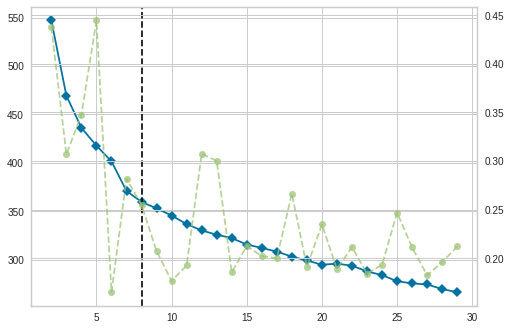

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = TimeSeriesKMeans(random_state=42)
elb_visualizer = KElbowVisualizer(model, k=(2,30))
X = np.vstack(mySeries)
elb_visualizer.fit(X)
# elb_visualizer.show("/content/drive/MyDrive/insight_data_analysis/Insight4wear Dataset 24 May 2021/result/elbow11.pdf",dpi=400)

# elb_visualizer.k_scores_
elb_visualizer.k_timers_

[2.4382076263427734,
 1.8043713569641113,
 0.7643082141876221,
 0.7700190544128418,
 0.8691754341125488,
 3.6794872283935547,
 1.7450180053710938,
 2.571873426437378,
 3.034066677093506,
 2.9285101890563965,
 3.6415224075317383,
 3.0988168716430664,
 3.2837352752685547,
 3.454728603363037,
 3.6951005458831787,
 3.597682476043701,
 3.517413854598999,
 3.313416004180908,
 4.1725335121154785,
 3.681840419769287,
 3.746223211288452,
 3.9345035552978516,
 4.530095100402832,
 4.720250129699707,
 3.996002674102783,
 4.2024126052856445,
 4.45720911026001,
 4.535935163497925]

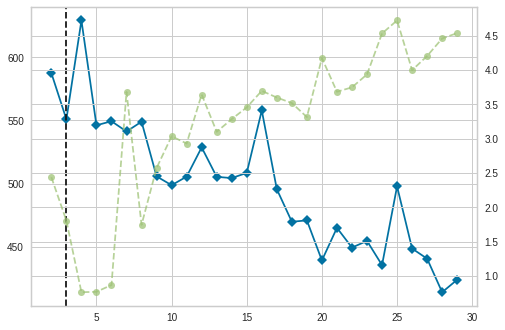

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KShape(random_state=42)
elb_visualizer = KElbowVisualizer(model, k=(2,30))
X = np.vstack(mySeries)
elb_visualizer.fit(X)
# elb_visualizer.show("/content/drive/MyDrive/insight_data_analysis/Insight4wear Dataset 24 May 2021/result/elbow2.pdf",dpi=400)
# elb_visualizer.k_scores_
elb_visualizer.k_timers_

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 322 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 322 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 322 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 322 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 322 1-dimensional timeseries
  '{} 1-dimensional ti

[9.02521562576294,
 7.84953236579895,
 8.034148931503296,
 8.167069435119629,
 7.687451124191284,
 8.110997915267944,
 7.75310754776001,
 8.043911695480347,
 7.824946403503418,
 8.003879070281982,
 8.035220623016357,
 7.8634419441223145,
 8.096002340316772,
 7.731940746307373,
 7.995083332061768,
 8.045537948608398,
 7.818262338638306,
 8.076687335968018,
 7.772873401641846,
 8.068825006484985,
 7.786301851272583,
 8.078407526016235,
 7.846612453460693,
 8.142979860305786,
 8.082502841949463,
 7.6125407218933105,
 8.146319389343262,
 7.805909156799316]

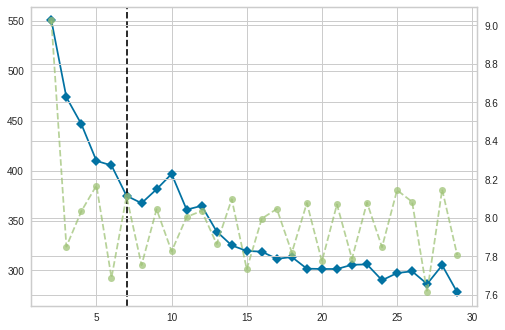

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KernelKMeans(random_state=42)
elb_visualizer = KElbowVisualizer(model, k=(2,30))
X = np.vstack(mySeries)
elb_visualizer.fit(X)
# elb_visualizer.show("/content/drive/MyDrive/insight_data_analysis/Insight4wear Dataset 24 May 2021/result/elbow3.pdf",dpi=400)
# elb_visualizer.k_scores_
elb_visualizer.k_timers_

In [ ]:
from sklearn.metrics.cluster import homogeneity_score
print(homogeneity_score(gt,labels))
print(homogeneity_score(gt,labels1))
print(homogeneity_score(gt,labels2))
print(homogeneity_score(gt,labels3))
print(homogeneity_score(gt,labels4))
print(homogeneity_score(gt,labels5))

0.2821591528639918
0.255338391258944
0.2028252178186177
0.2451705998998664
0.09033449760552269
0.07879906250092462
